<a href="https://colab.research.google.com/github/RahulI5/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - EDA/ML/Classification
##### **Contribution**    - Individual

# **Project Summary -**

Mobile Price Range Prediction is a machine learning project that involves the prediction of the price range of a mobile phone based on its specifications. This project has significant implications for both consumers and manufacturers in the mobile phone industry, as it can provide valuable insights into the factors that influence the price of mobile phones and enable more informed decision-making.


To accomplish this task, various machine learning algorithms can be used, including Random Forest Classifier and XGB Classifier. These algorithms work by building predictive models based on a training dataset of mobile phone features and their corresponding price ranges. The accuracy of the model can be improved by optimizing the model parameters and selecting the most relevant features.

This project involves several steps, including data collection and preprocessing, feature selection, feature engineering, model training and validation, & model evaluation. The performance of the model can be measured using various metrics such as accuracy, precision, and recall.

In real world, the mobile price range prediction models can be used by mobile phone manufacturers and retailers to optimize their pricing strategies and improve their competitiveness in the market. They can also be used by consumers to make more informed decisions when purchasing mobile phones.

Overall, the mobile price range prediction project is a valuable application of machine learning that has the potential to benefit both businesses and customers in the mobile phone industry.

# **GitHub Link -**

https://github.com/RahulI5/Mobile-Price-Range-Prediction

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(e.g:- RAM, internal memory, etc.) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.  **

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [54]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from scipy import stats 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgbm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

### Dataset Loading

In [4]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/ML Capstone Project- Classification/data_mobile_price_range.csv")

### Dataset First View

In [5]:
# Dataset First Look
df.sample(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1457            840     0          0.9         1   6       0          33   
1402            948     0          1.5         1   6       0          18   
1319            987     1          2.3         0   9       0          17   
1146           1923     0          1.0         1   5       1          14   
471            1948     0          2.8         1   8       0          16   
1252            917     1          0.5         0   1       1          31   
568            1288     0          2.8         1  15       0          50   
721             808     0          0.5         1   0       0           8   
379            1187     1          2.2         0   0       1          46   
1959           1884     0          1.0         1   3       0          24   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1457    0.7        150        6  ...       1482      1591  2072    10     8   
1402    0.3        119        4  ...        340      1728  2926    17    13   
1319    0.8        124        7  ...        887      1274  3885    11     0   
1146    0.9        154        4  ...         15       525  2519    13     0   
471     0.1        100        5  ...        631      1940  3630     9     7   
1252    0.5         88        6  ...        423       909  3424    19     2   
568     0.1        121        2  ...       1177      1809  3129    17     6   
721     0.1        192        4  ...        618      1891  3762    15     9   
379     0.4        145        2  ...       1173      1814  3917    13    11   
1959    0.5        149        6  ...       1168      1179  1396    15     8   

      talk_time  three_g  touch_screen  wifi  price_range  
1457         19        0             1     0            2  
1402          9        1             1     1            2  
1319         14        1             1     0            3  
1146         16        1             0     1            2  
471          17        0             1     0            3  
1252         13        1             1     0            3  
568           2        0             0     0            3  
721          12        1             0     1            3  
379           8        1             0     1            3  
1959          9        1             1     1            1  

[10 rows x 21 columns]

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### What did you know about your dataset?

In given dataset, There were no null values and duplicates, so treatment for null values was not required

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

### Variables Description 

* Battery_Power: Battery capacity in mAh
* Blue: Has bluetooth or not
* Clock_speed: speed at which microprocessor executes instructions
* Dual_sim: Has dual sim support or not
* Fc: Front Camera megapixels
* Four_g: Has 4G or not
* int_memory: Internal memory capacity
* M_dep: Mobile depth in cm
* Mobile_wt: Weight of mobile phone
* N_cores: Number of cores in processor
* Pc: Primary Camera mega pixels
* Px_height: Pixel resolution height
* Px_width: Pixel resolution width
* Ram: Random Access Memory in MB
* Sc_h: Screen height
* Sc_w: Screen width
* Talk_time: Longest that a single battery can last over a call
* Three_g: Has 3g or not
* Wifi: Has wifi or not
* Price_range: This is target variable with a value of 0(lowcost), 1(medium cost), 2(high cost), 3(very high cost)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns:
  print("The number of unique values in column",i,"is",df[i].nunique())

The number of unique values in column battery_power is 1094
The number of unique values in column blue is 2
The number of unique values in column clock_speed is 26
The number of unique values in column dual_sim is 2
The number of unique values in column fc is 20
The number of unique values in column four_g is 2
The number of unique values in column int_memory is 63
The number of unique values in column m_dep is 10
The number of unique values in column mobile_wt is 121
The number of unique values in column n_cores is 8
The number of unique values in column pc is 21
The number of unique values in column px_height is 1137
The number of unique values in column px_width is 1109
The number of unique values in column ram is 1562
The number of unique values in column sc_h is 15
The number of unique values in column sc_w is 19
The number of unique values in column talk_time is 19
The number of unique values in column three_g is 2
The number of unique values in column touch_screen is 2
The numbe

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
# Value counts in price_range column
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [15]:
# Mobile phones bifurcated with 3g-4g supported and not supported.
Four_g = df.groupby('four_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)
Three_g = df.groupby('three_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)
print(Three_g)
print(Four_g)

   three_g  price_range  Count
4        1            2    387
5        1            3    385
6        1            1    378
7        1            0    373
0        0            0    127
1        0            1    122
2        0            3    115
3        0            2    113
   four_g  price_range  Count
4       1            3    275
5       1            1    262
6       1            0    259
0       0            2    253
7       1            2    247
1       0            0    241
2       0            1    238
3       0            3    225


In [16]:
# Checked Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
# Checked categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 21 numerical variables
There are 0 categorical variables


In [17]:
# Value counts in the n_cores.
df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

### What all manipulations have you done and insights you found?

In the given dataset, we showed several mobile phones on the basis of network support and cores counts in our dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

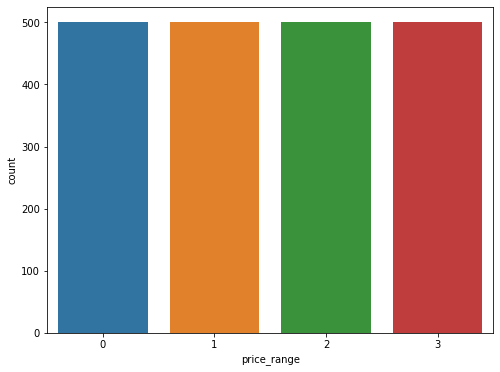

In [18]:
# Chart - 1 visualization code
plt.figure(figsize = [8,6])
sns.countplot(df['price_range'])
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a type of chart that represents data with rectangular bars and used to show comparisons between categories or to track changes over time. They are often easy to read and understand, making them a popular choice for presenting data in a visual format.

##### 2. What is/are the insight(s) found from the chart?

Our dependent variable i.e. price_range is equally distributed amongst the variable.

#### Chart - 2

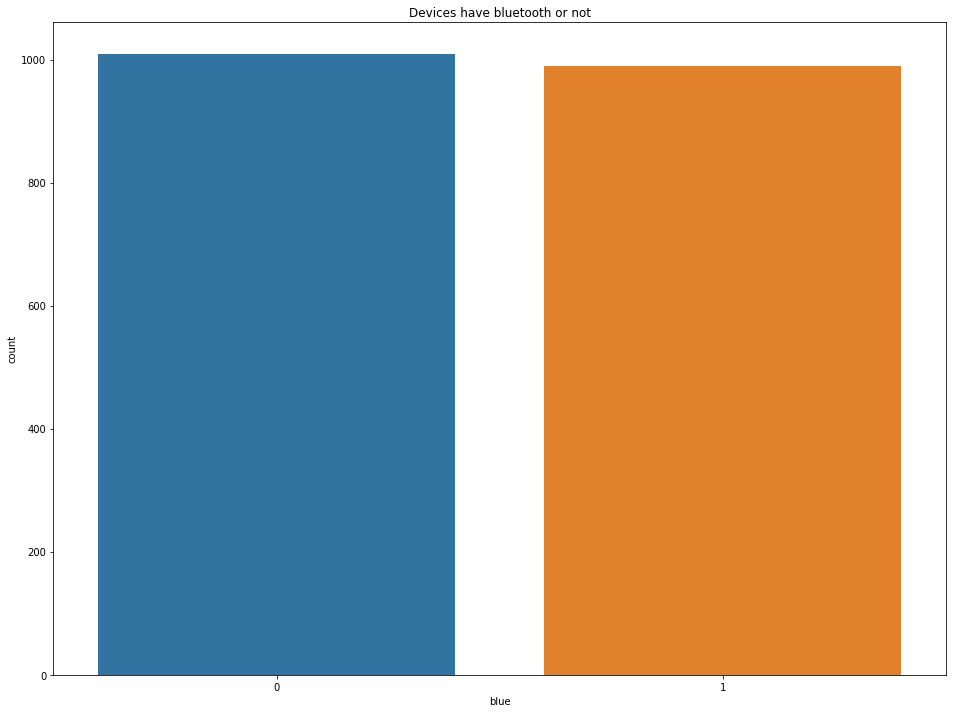

In [19]:
# Chart - 2 visualization code
plt.figure(figsize = [16,12])
sns.countplot(df['blue'],data=df)
plt.title('Devices have bluetooth or not')
plt.show()

In [69]:
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

##### 1. Why did you pick the specific chart?

A bar chart is a type of chart that represents data with rectangular bars and used to show comparisons between categories or to track changes over time. They are often easy to read and understand, making them a popular choice for presenting data in a visual format.

##### 2. What is/are the insight(s) found from the chart?

In 1,010 devices have bluetooth are there while in 990 devices are not there.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight gives customers to choose the mobile phones as per the specification they need.

#### Chart - 3

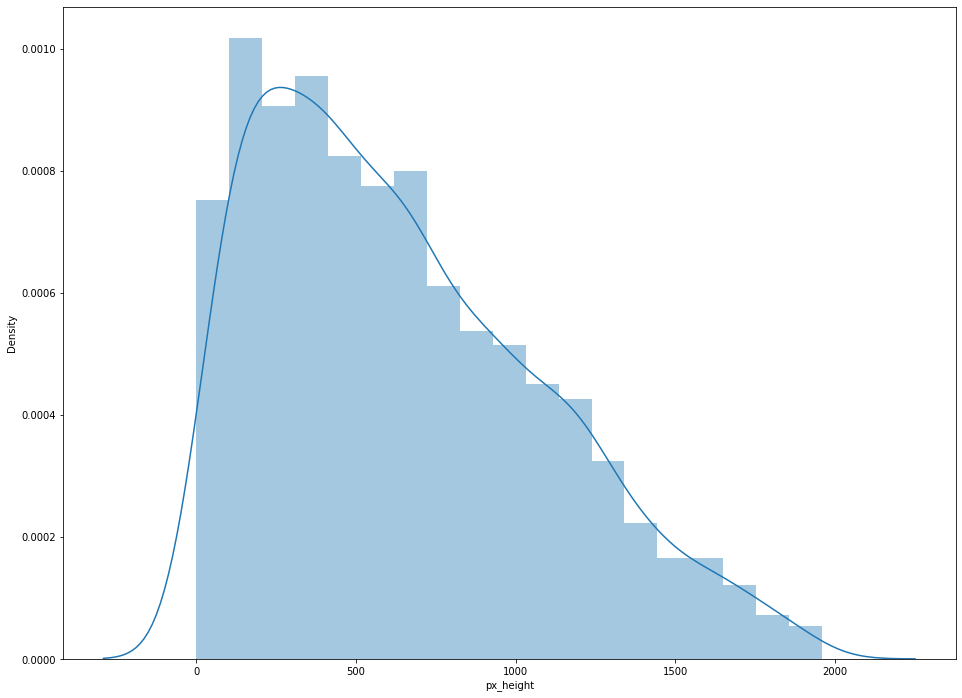

In [20]:
# Chart - 3 visualization code
plt.figure(figsize = [16,12])
sns.distplot(df['px_height'])
plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. It represents the overall distribution of continous data variables.

##### 2. What is/are the insight(s) found from the chart?

As shown above, we get overall distribution of the data in the feature name "px_weight" using distplot.

#### Chart - 4

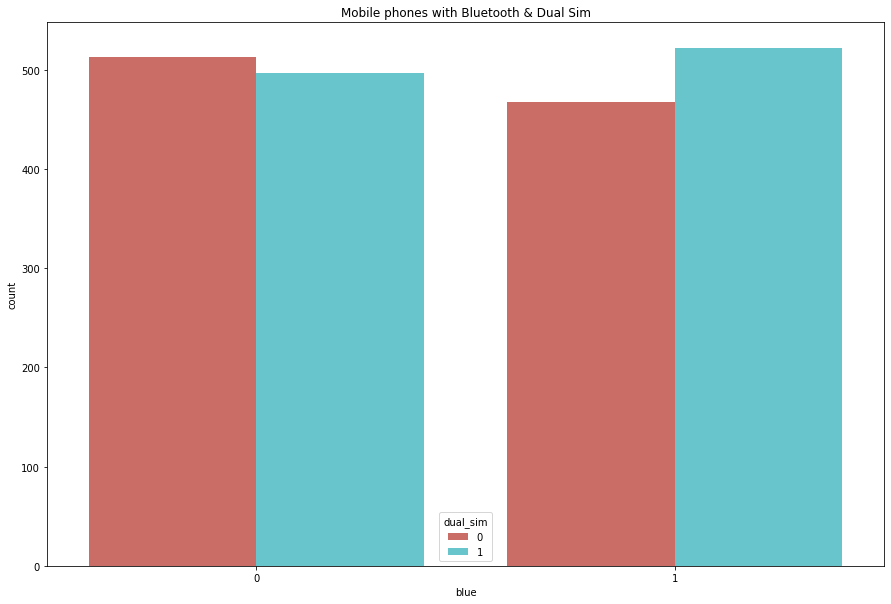

In [21]:
# Chart - 4 visualization code
plt.figure(figsize = (15,10))
plt.title('Mobile phones with Bluetooth & Dual Sim')
sns.countplot(df['blue'], hue= df['dual_sim'], palette = 'hls')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurence or counts of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

For the above plot, we have compare the mobile phone which supports bluetooth as well as dual sim slot.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight gives customers to choose the mobile phones as per the specification they need and will increase the sale of the mobile phone which have bluetooth and dual sim.

#### Chart - 5

In [22]:
# Chart - 5 visualization code
# Function to plot the distribution of the Categorical feature for each price range 
def plot_price_range(column_name):
  fig, axs = plt.subplots(1,4, figsize=(20,6))
  for i in range(4):
    sns.countplot(x=df[df['price_range']==i][column_name] , ax=axs[i])
    axs[i].set_xlabel(f'{column_name} category')
    axs[i].set_xlabel(f'for price_range = {i}')

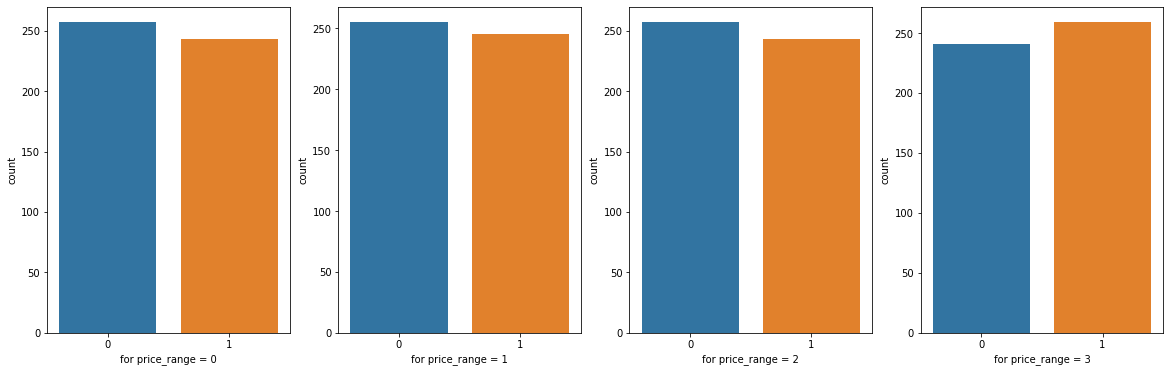

In [23]:
plot_price_range("blue")

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurence or counts of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

For above chart, we compared the devices which have bluetooth with different price range, where price_range 0 and 2 had the least bluetooth feature count whereas price_range 3 had the most count of bluetooth available in the devices.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will attract the customers who prefer bluetooth in their mobile phones.

#### Chart - 6

In [24]:
# Chart - 6 visualization code
num_columns = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

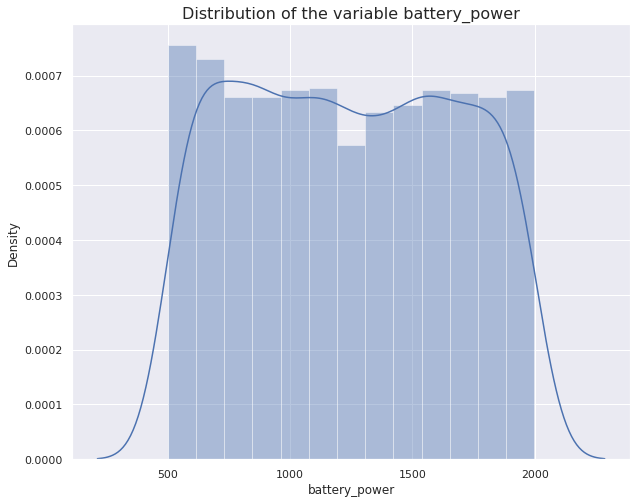

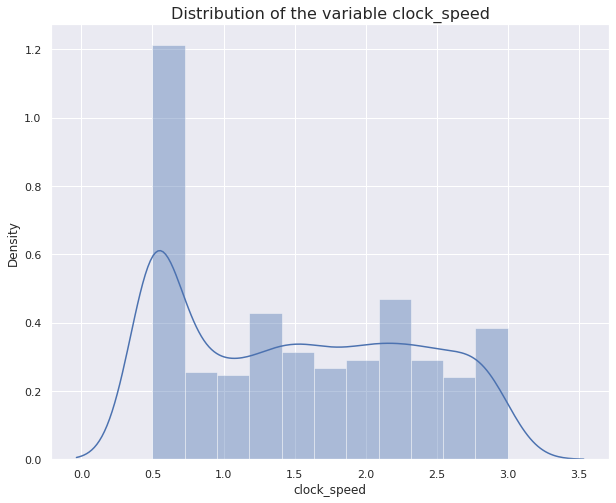

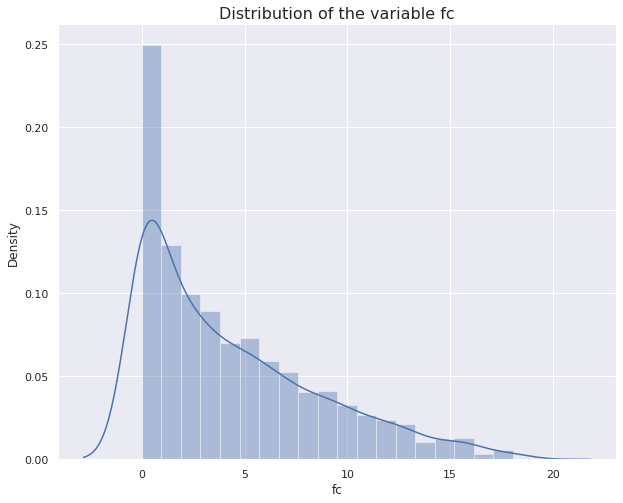

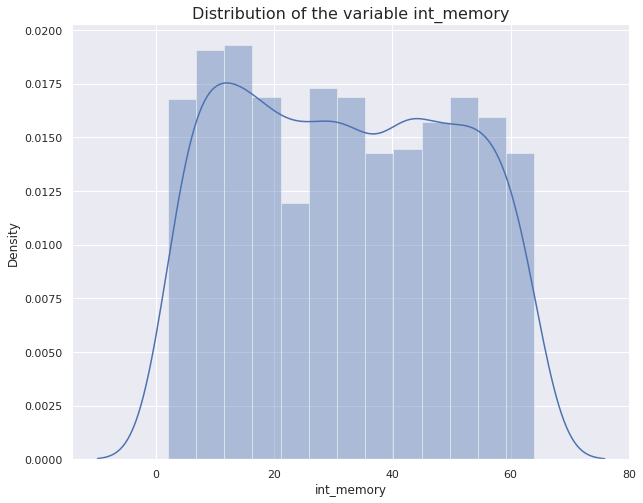

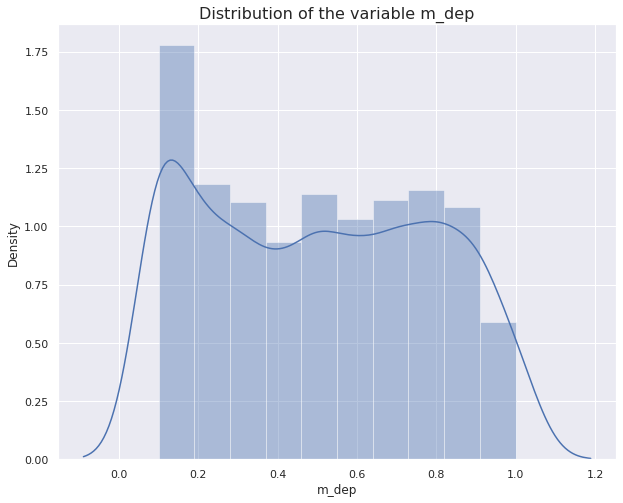

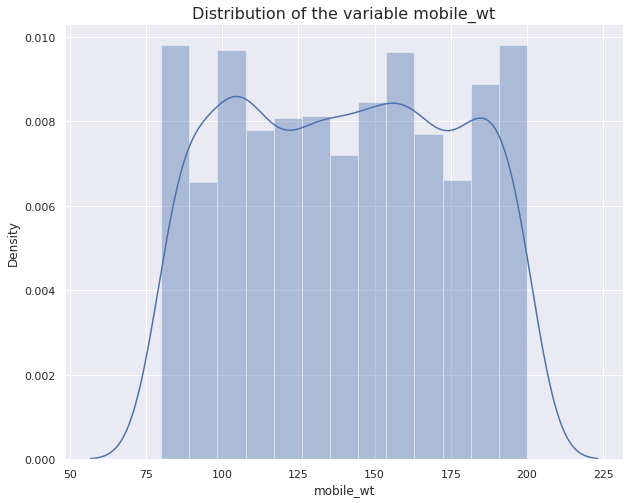

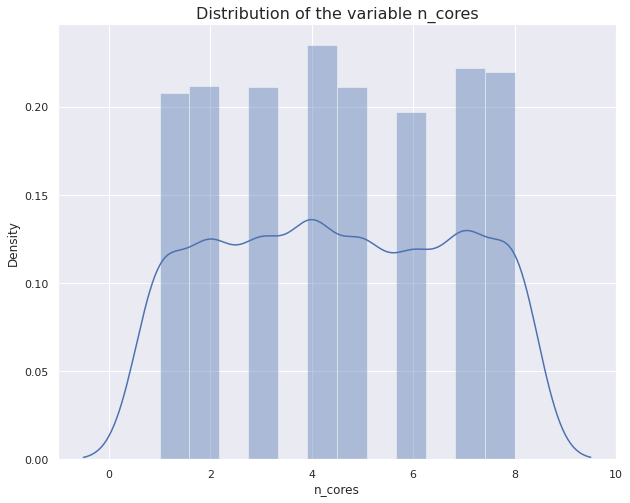

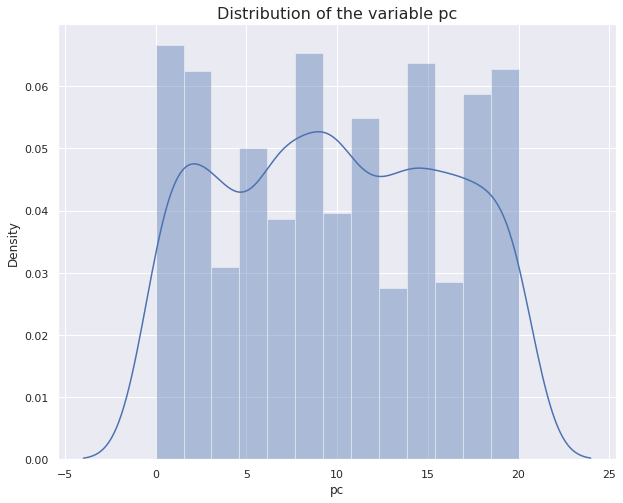

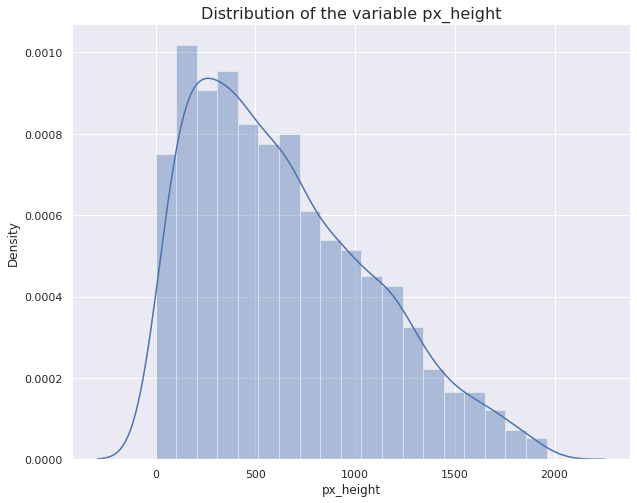

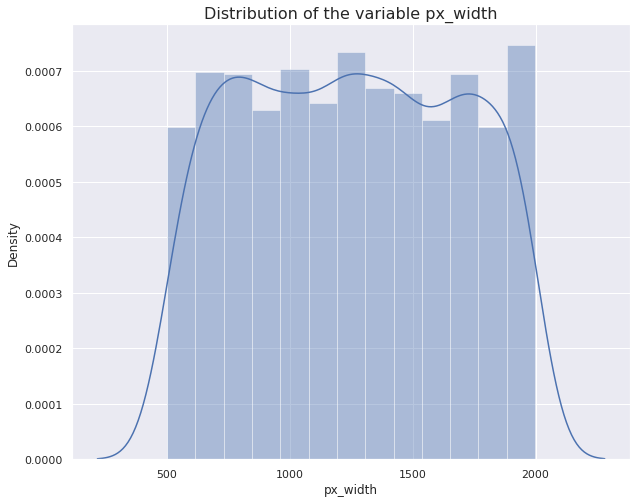

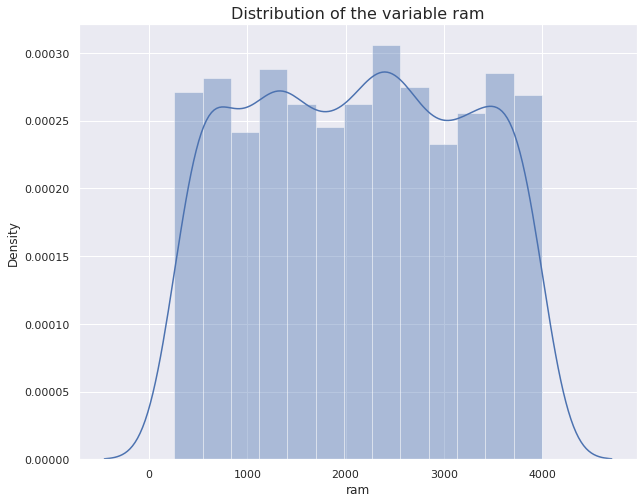

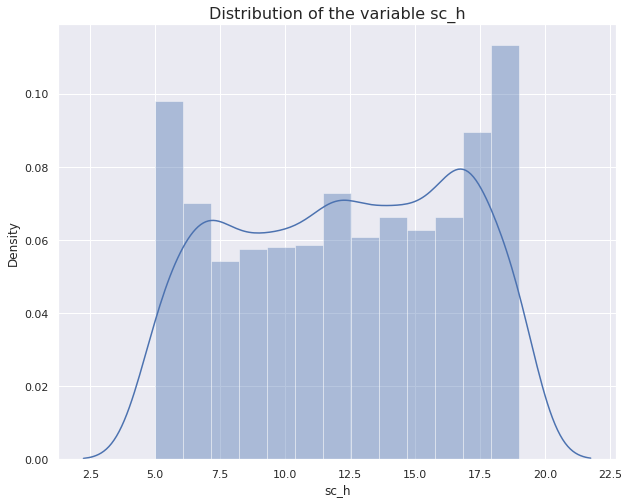

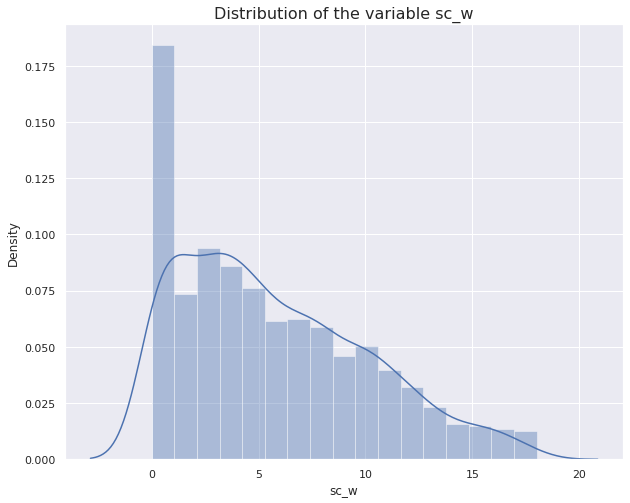

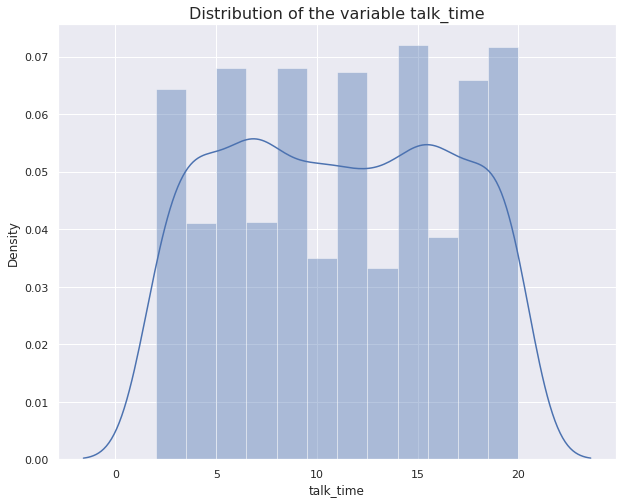

In [25]:
# Plotted the distribution of Numerical Features.
for col in num_columns:
  sns.set(rc={'figure.figsize':(10,8)})
  sns.set_color_codes('pastel')
  sns.distplot(df[col])
  plt.title(f"Distribution of the variable {col}", fontsize=16)
  plt.xlabel(f"{col}")
  plt.ylabel("Density")
  plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. It represents the overall distribution of continous data variables.

##### 2. What is/are the insight(s) found from the chart?

1.   The count of phones is equally distributed among all the parameters in every variable except pixel height.
2.   The number of phones tends to decrease as we go higher in pixel height i.e. we can say that the graph is positively skewed.



#### Chart - 7

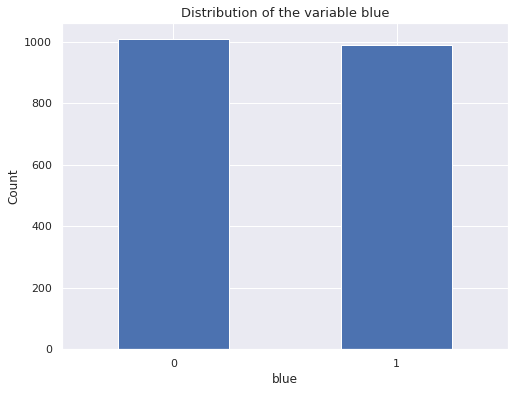

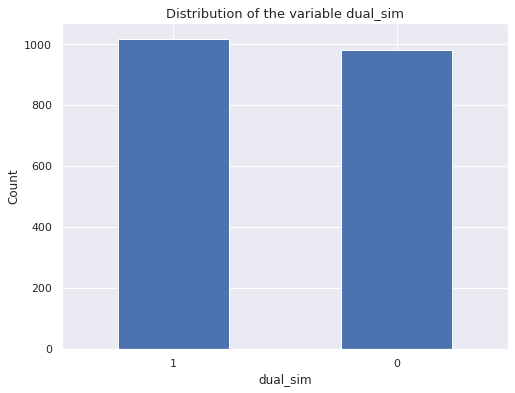

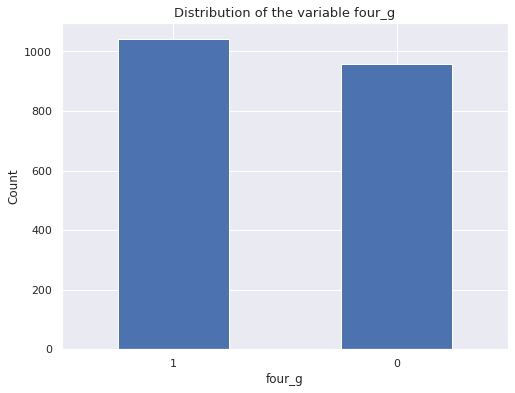

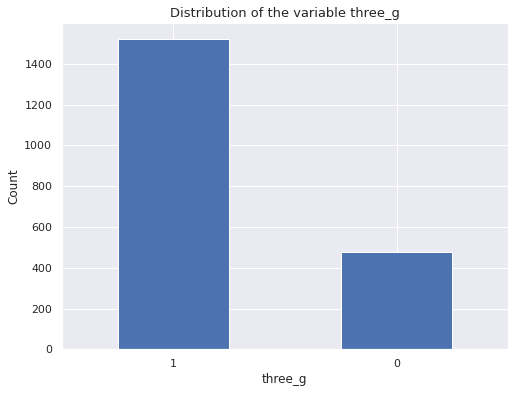

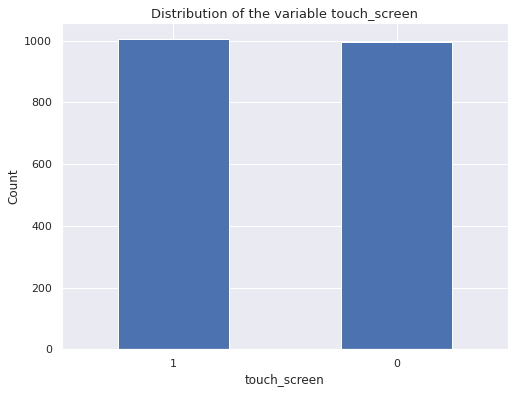

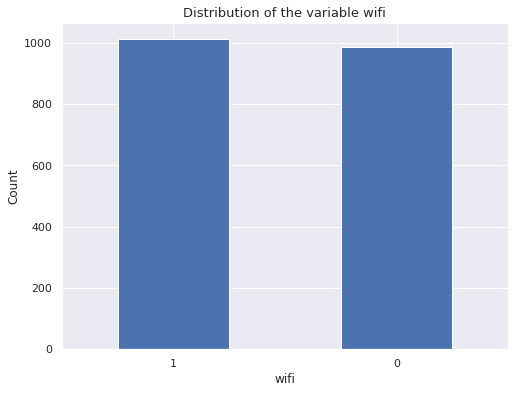

In [26]:
# Chart - 7 visualization code
category_columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
chart = sns.set(rc={'figure.figsize':(8,6)})
for col in category_columns:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Distribution of the variable {col}",fontsize=13)
  plt.xlabel(f"{col}")
  plt.xticks(rotation=0)
  plt.ylabel("Count")
  plt.show()

##### 1. Why did you pick the specific chart?

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. A bar chart describes the comparisons between the discrete categories.

##### 2. What is/are the insight(s) found from the chart?

On above plot, we have checked the data distribution by using bar in the feature which have categorical data where all variable have almost equal distribution except three_g and four_g.

#### Chart - 8

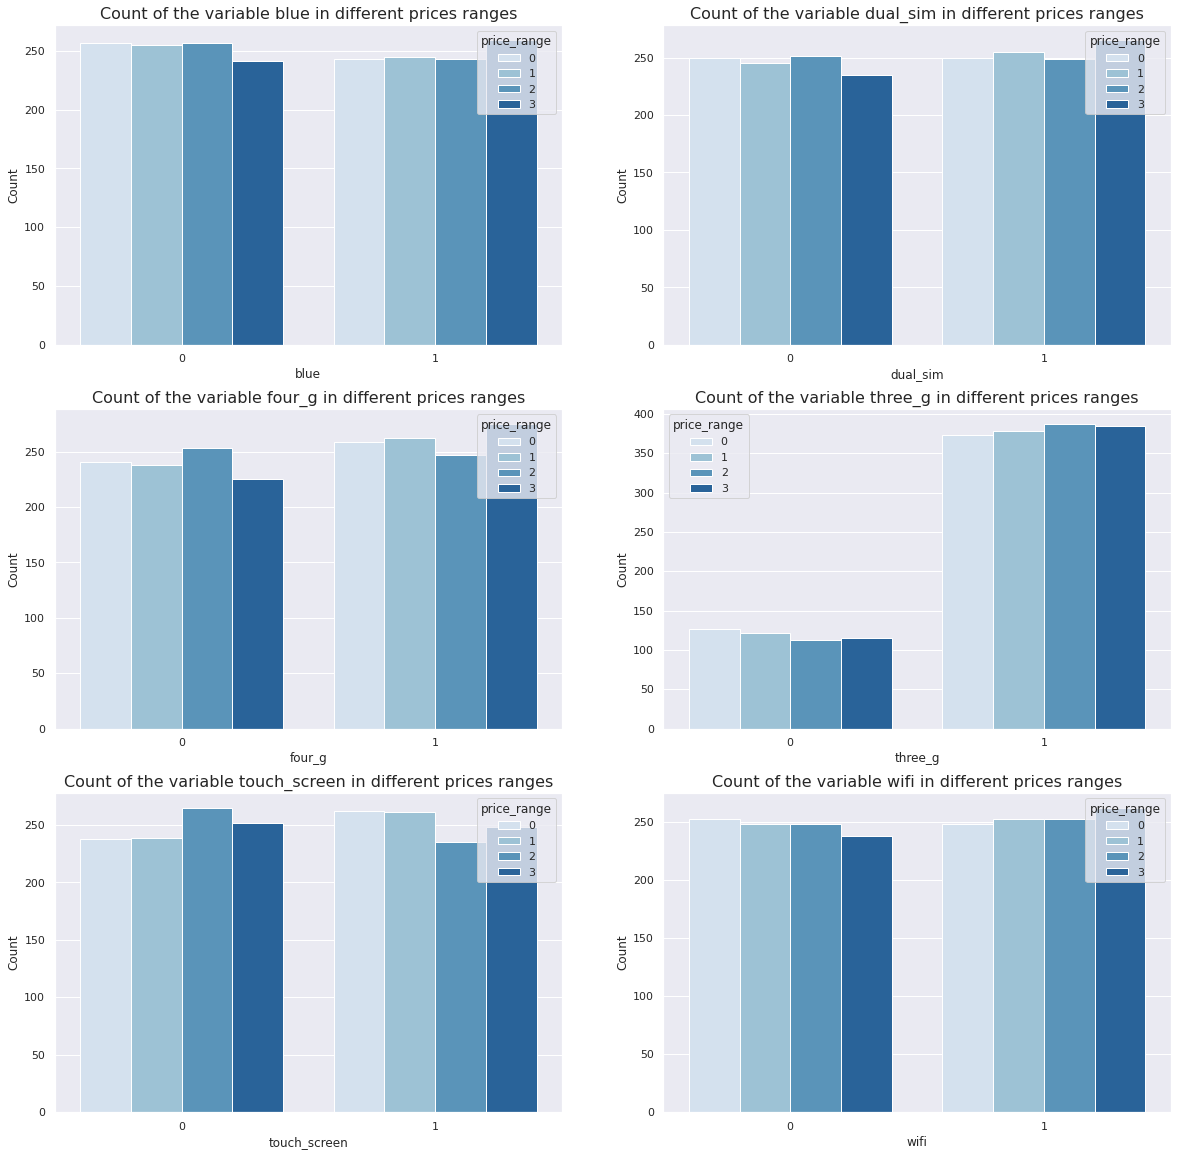

In [27]:
# Chart - 8 visualization code
count = 1
plt.subplots(figsize=(20,20))
for col in category_columns:
  plt.subplot(3,2,count)
  sns.countplot(df[col], hue=df['price_range'], palette='Blues')
  
  plt.title(f"Count of the variable {col} in different prices ranges", fontsize=16)
  plt.xlabel(f"{col}")
  plt.ylabel("Count")
  count += 1

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurence or counts of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

For above plot, we have checked the different price distribution with the different specification and functions in the mobile phone. So that we can compare the less key feature mobile phone according to their price.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

For the above plot, the customers have flexibility to choose the mobile phone with the functions and feature they need as per their price range or budget.

#### Chart - 9

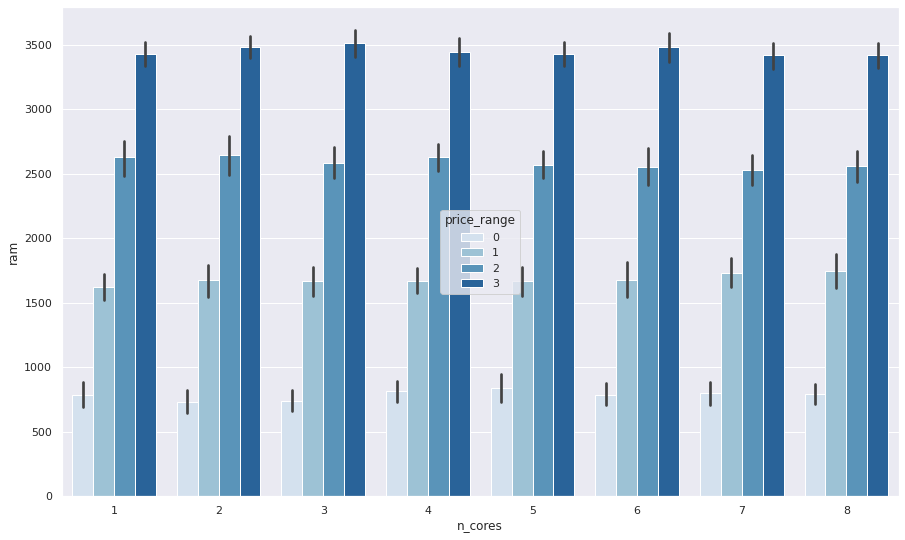

In [28]:
# Chart - 9 visualization code
plt.figure(figsize=(15,9))
sns.barplot(x='n_cores',y='ram',hue='price_range', data=df, palette= 'Blues')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around the estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

For the above plot, we have find out how number of cores and RAM vary with different price range.

#### Chart - 10

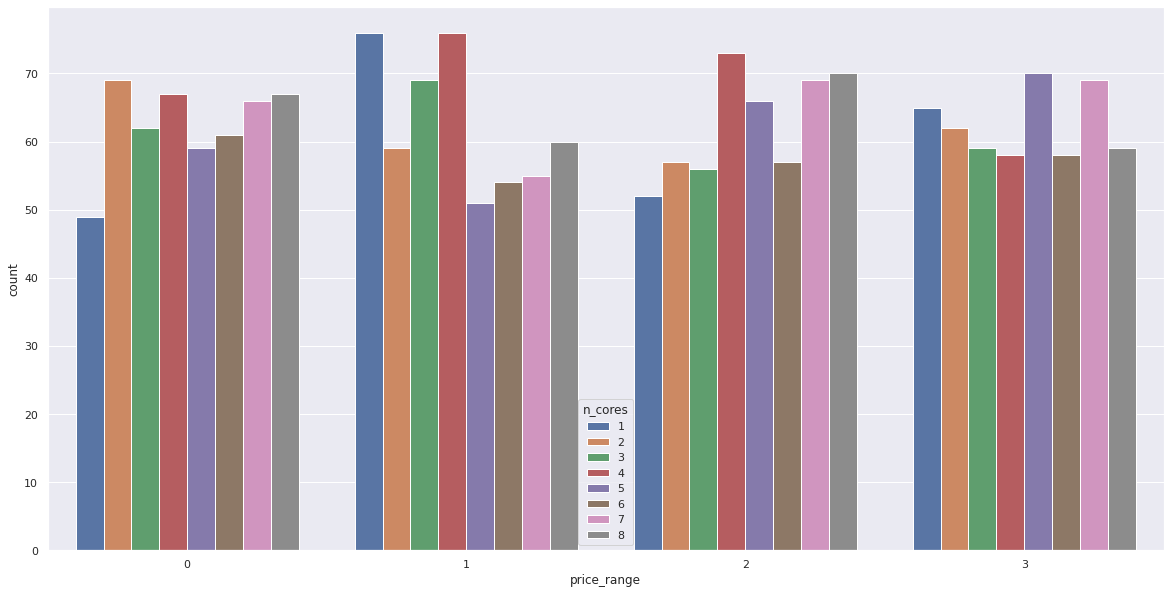

In [29]:
# Chart - 10 visualization code
plt.figure(figsize = (20,10))
sns.countplot(x='price_range', hue='n_cores', data=df)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurence or counts of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

For the above plot, we have analyzed the no. of cores with the different price range. Where price range 2 has the highest no. of cores.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This will helpful for the customers who purchase mobile phone as per the core they need in their handset.

#### Chart - 11

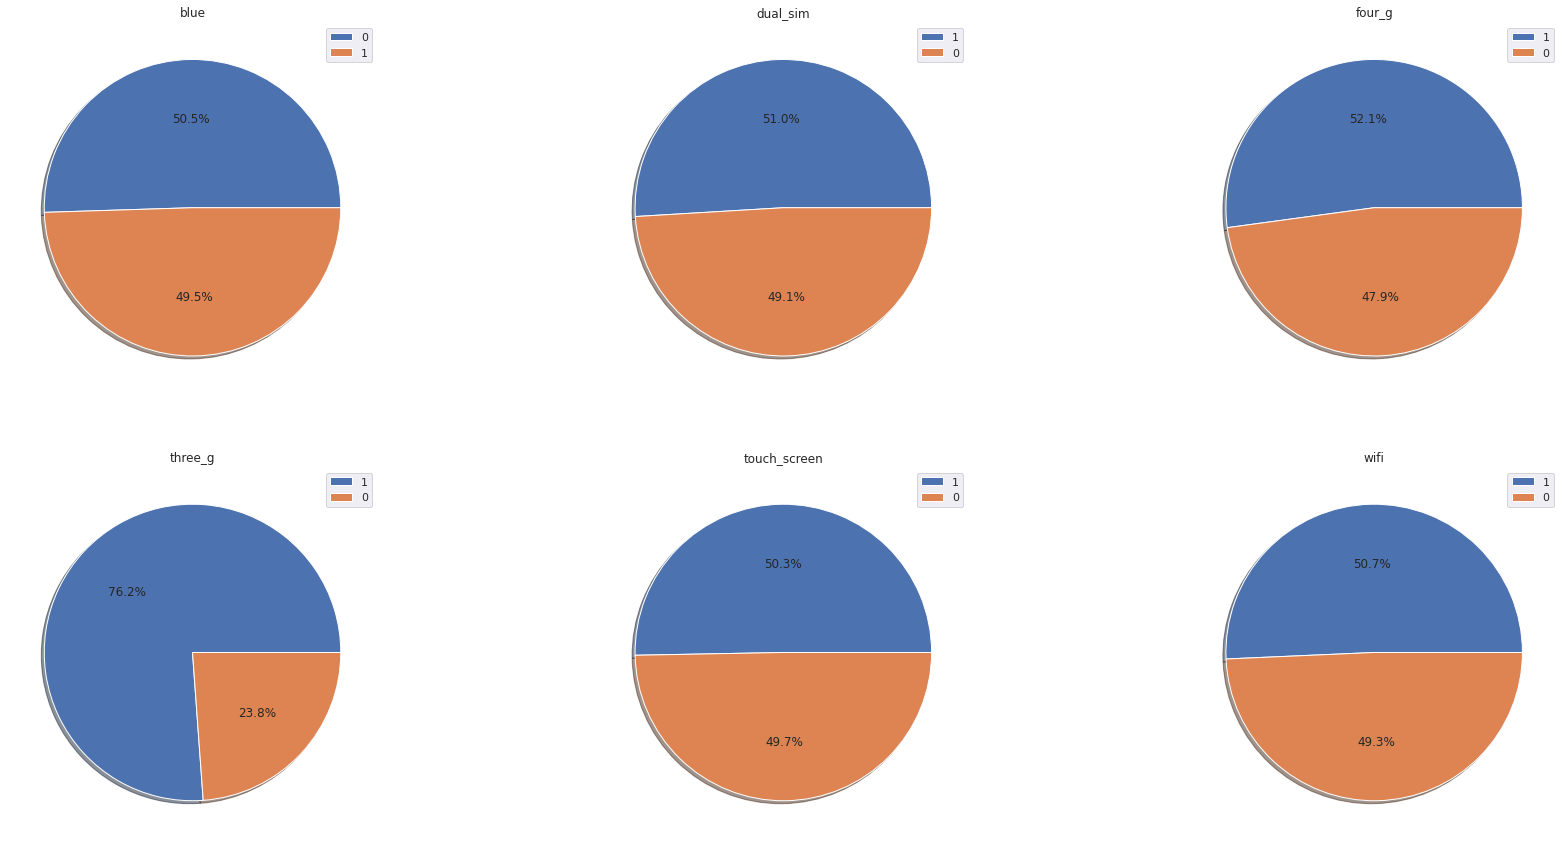

In [30]:
# Chart - 11 visualization code
category_columns = df[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]
plt.figure(figsize=(30,15))
j=1
for i in category_columns:
  plt.subplot(2, 3, j)
  j+=1
  category_columns[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labeldistance=None)
  plt.legend()
  plt.ylabel("")
  plt.title(i)

##### 1. Why did you pick the specific chart?

A pie plot is a proportional representation of the numerical data in a column.

##### 2. What is/are the insight(s) found from the chart?

In the above plot, we have visualise how much area they represent in the feature name "blue", "dual_sim", "four_g", "three_g", "touch_screen" & "wifi" which have categorical data.

#### Chart - 12

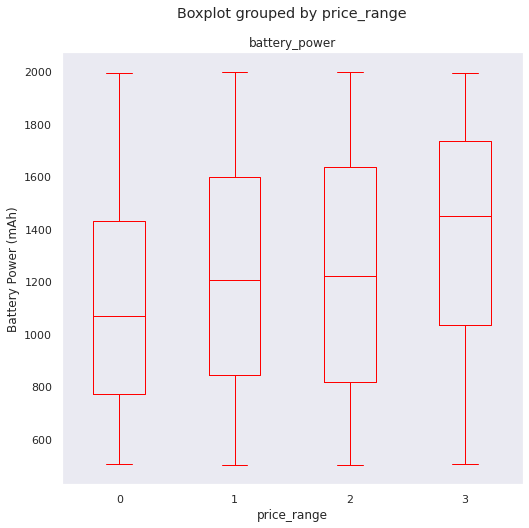

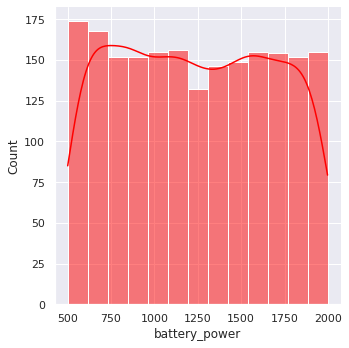

In [31]:
# Chart - 12 visualization code
sns.set_style("darkgrid")
df.boxplot(by ='price_range', column =['battery_power'], grid = False,figsize=(8,8),color='red'),
plt.ylabel("Battery Power (mAh)")

sns.set(rc={'figure.figsize':(8,8)})
ax=sns.displot(data=df["battery_power"],kde=True,color='red')

plt.show()

##### 1. Why did you pick the specific chart?

A Boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

##### 2. What is/are the insight(s) found from the chart?

This boxplot shows how the battery mAh is spread and there is a gradual increase in the battery_power as the price range increases.


#### Chart - 13 - Correlation Heatmap

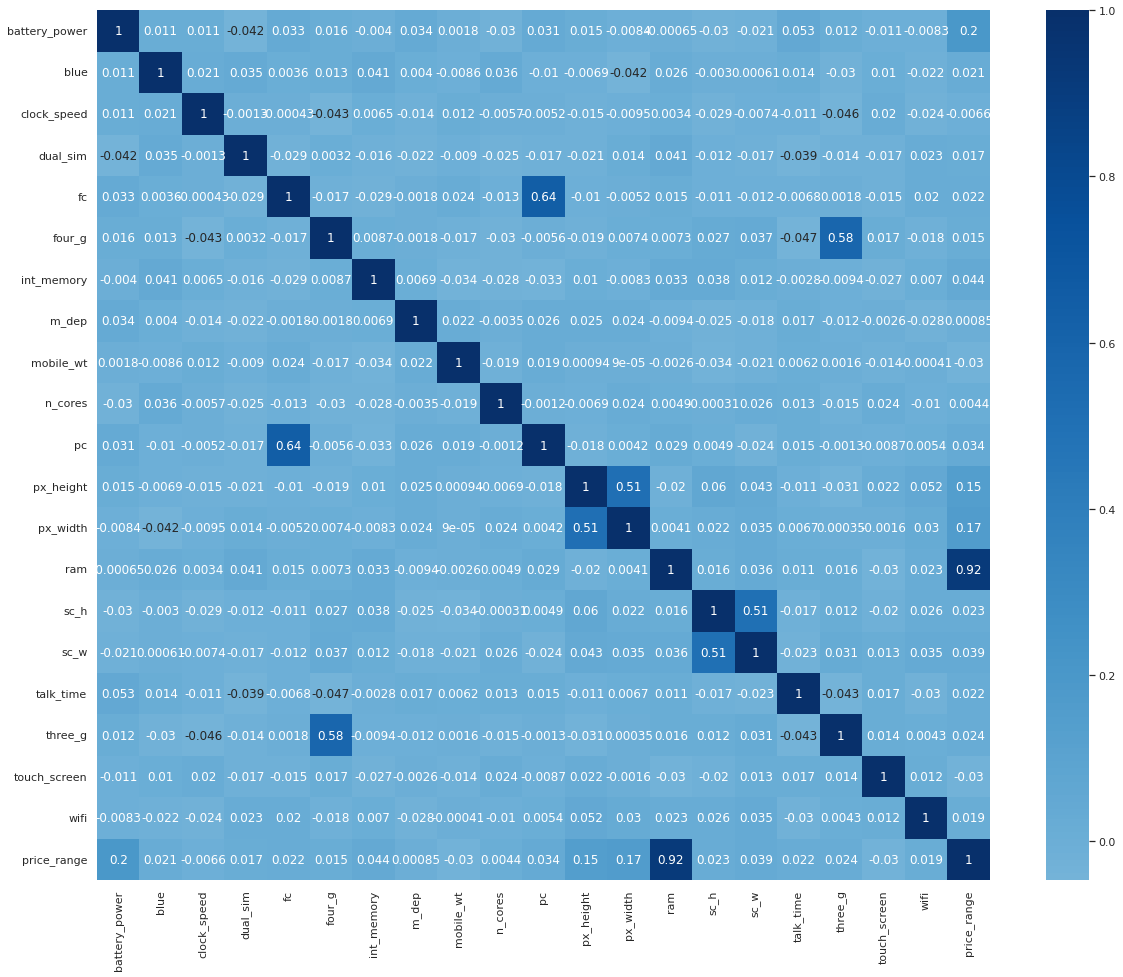

In [32]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True, center = 0, cmap='Blues')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

##### 2. What is/are the insight(s) found from the chart?

1.   As shown above, the correlation between RAM and price_range shows high. It signifies that RAM will play major deciding factor in estimating the price range.
2. Three and Four also correlated which means mobile phone which has 4G will always have 3G cellular network.
2.   fc (Front camera) and pc (Primary camera) shows higher correlation that means front camera is good then primary camera will also be good as well.
3.   Also if px_height increases, px_width also increases, that means the overall pixels in the screen.
4.   Battery_power also has positive correlation with the price_range. Also mobile phone having high price comes with good battery backup.



#### Chart - 14 - Pair Plot 

In [33]:
# Pair Plot visualization code
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

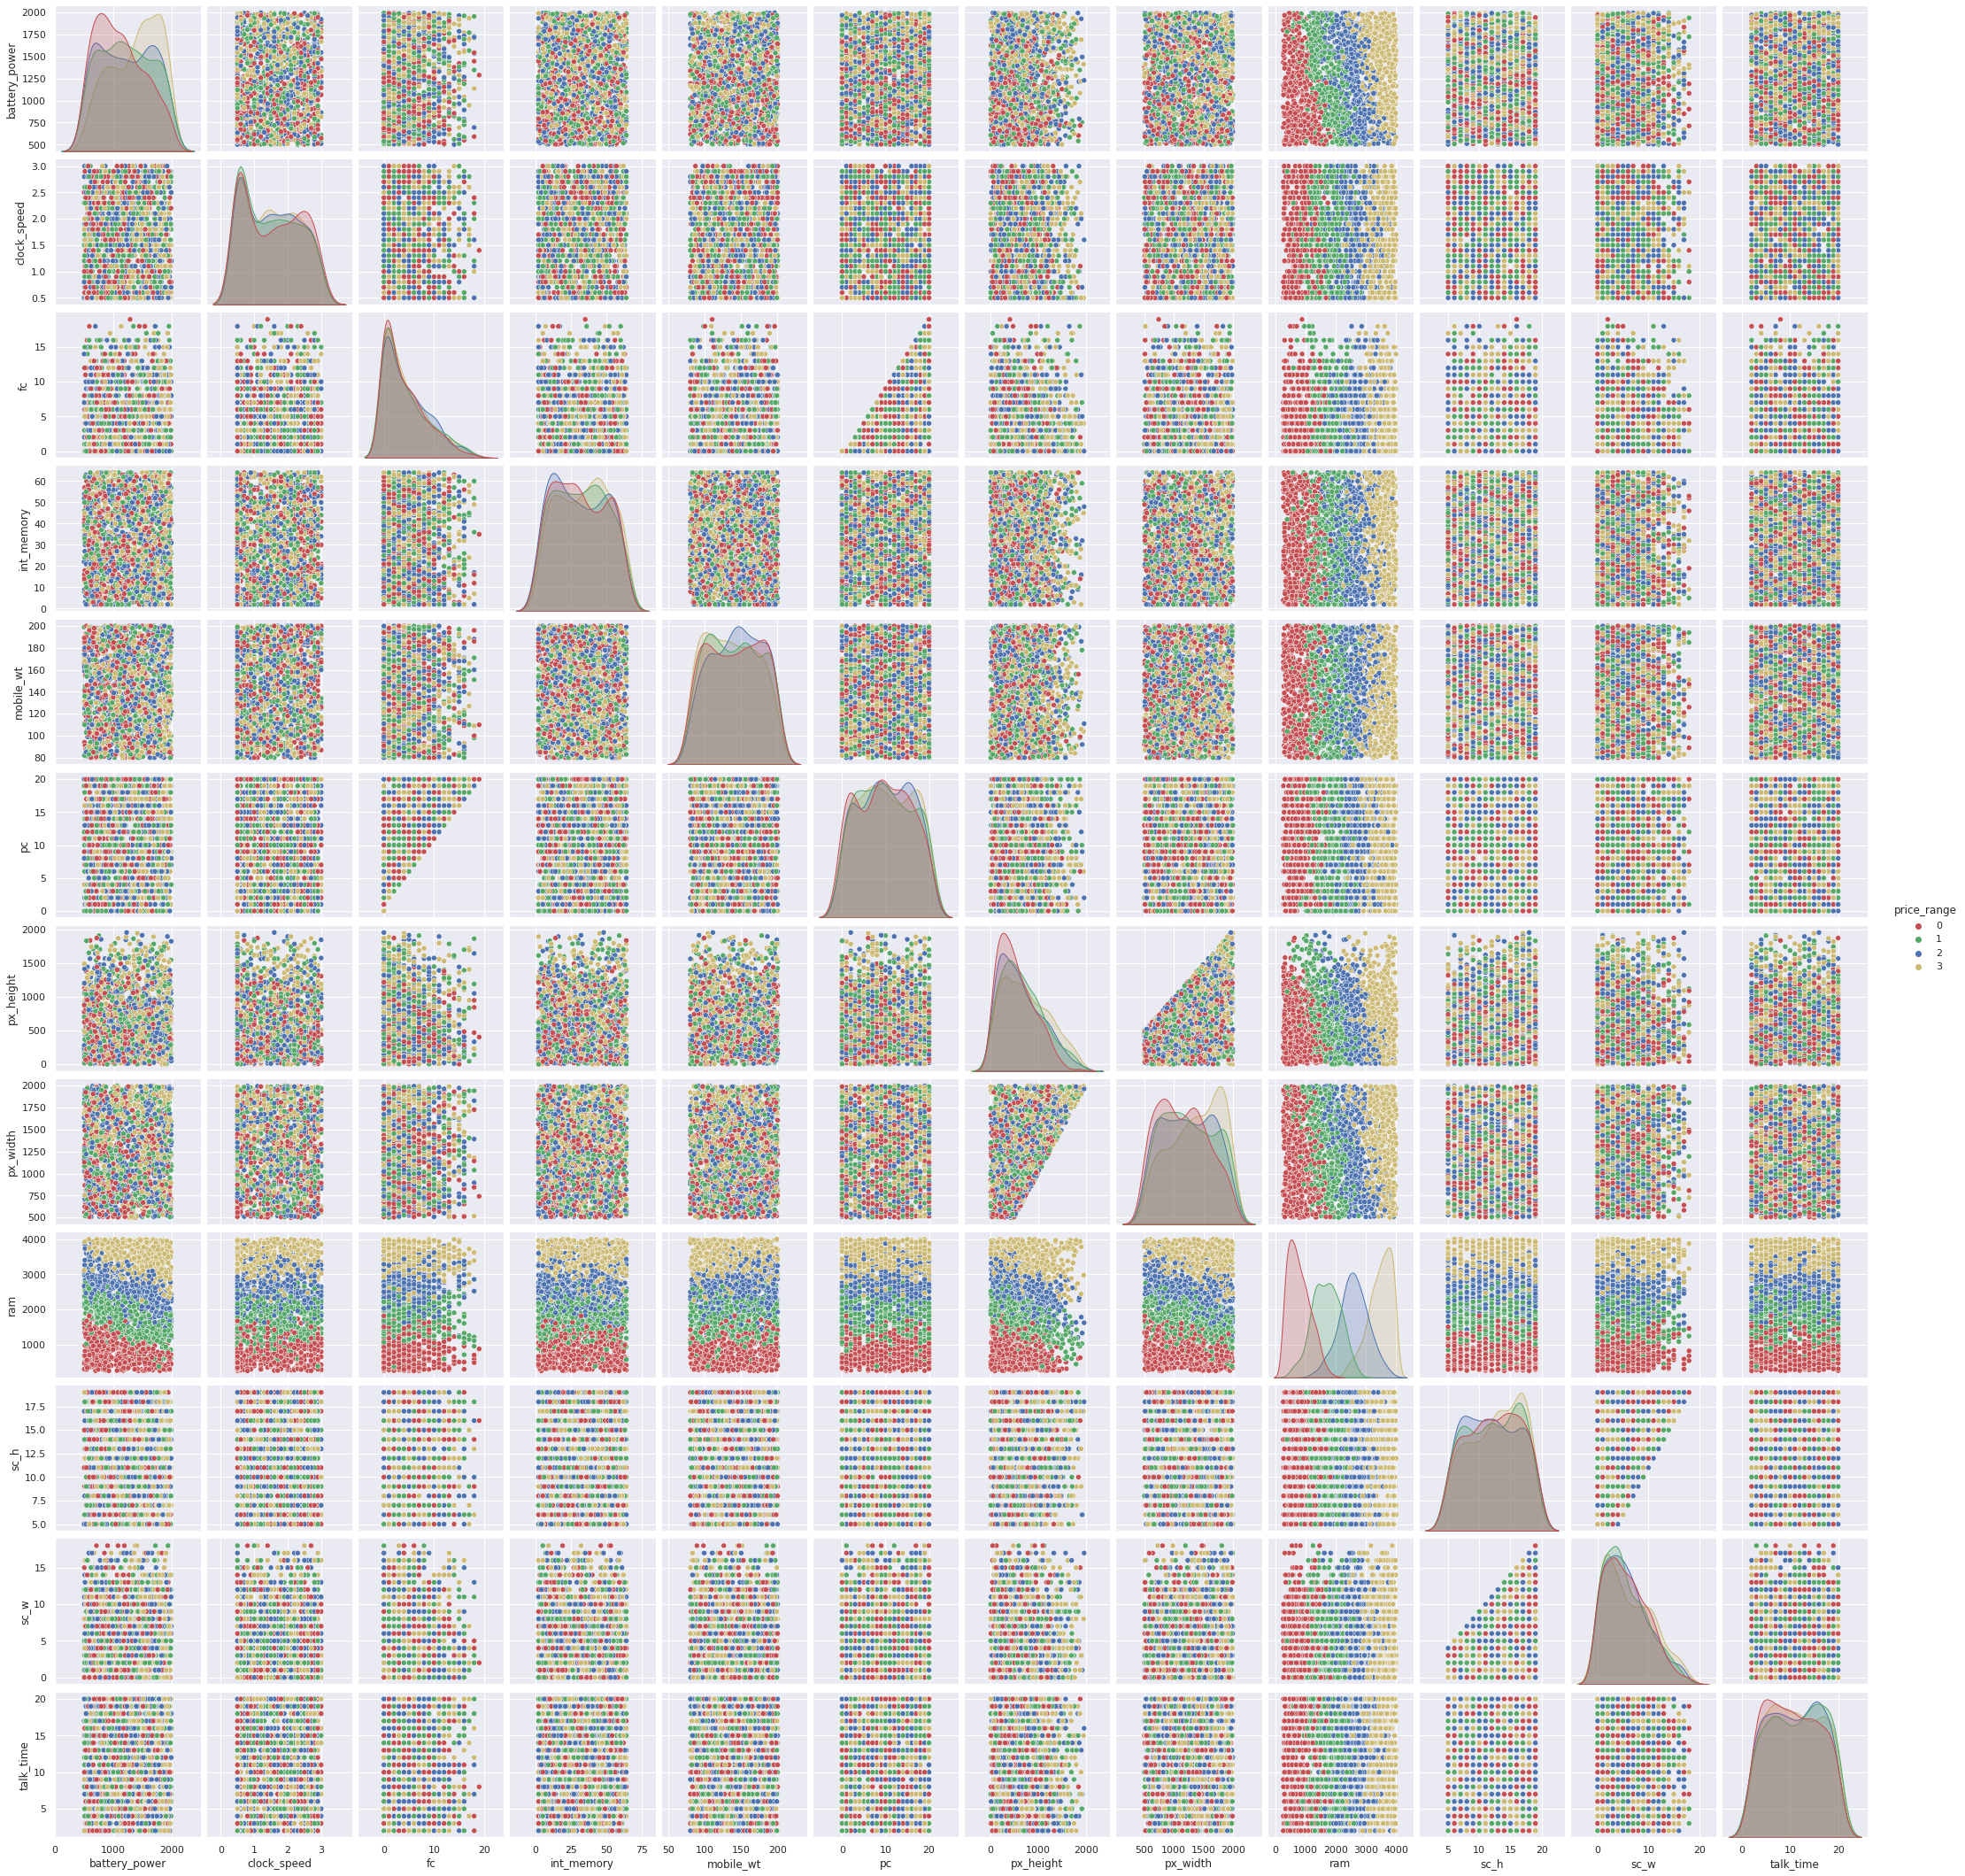

In [34]:
#Do a pairplot of the variables
df_pair = df[['battery_power', 'clock_speed', 'fc',
       'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','price_range']]
sns.pairplot(df_pair,hue='price_range',palette=['r', 'g', 'b', 'y'])

##### 1. Why did you pick the specific chart?

A pairplot plot a pairwise relationships in a dataset. It is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

On the above plot, we had plotted the several features in the pairplot where "ram" column shows finest separation with other columns in the pair plot.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As shown above there is no missing values present in our data, so treatment for null values was not required

### 2. Handling Outliers

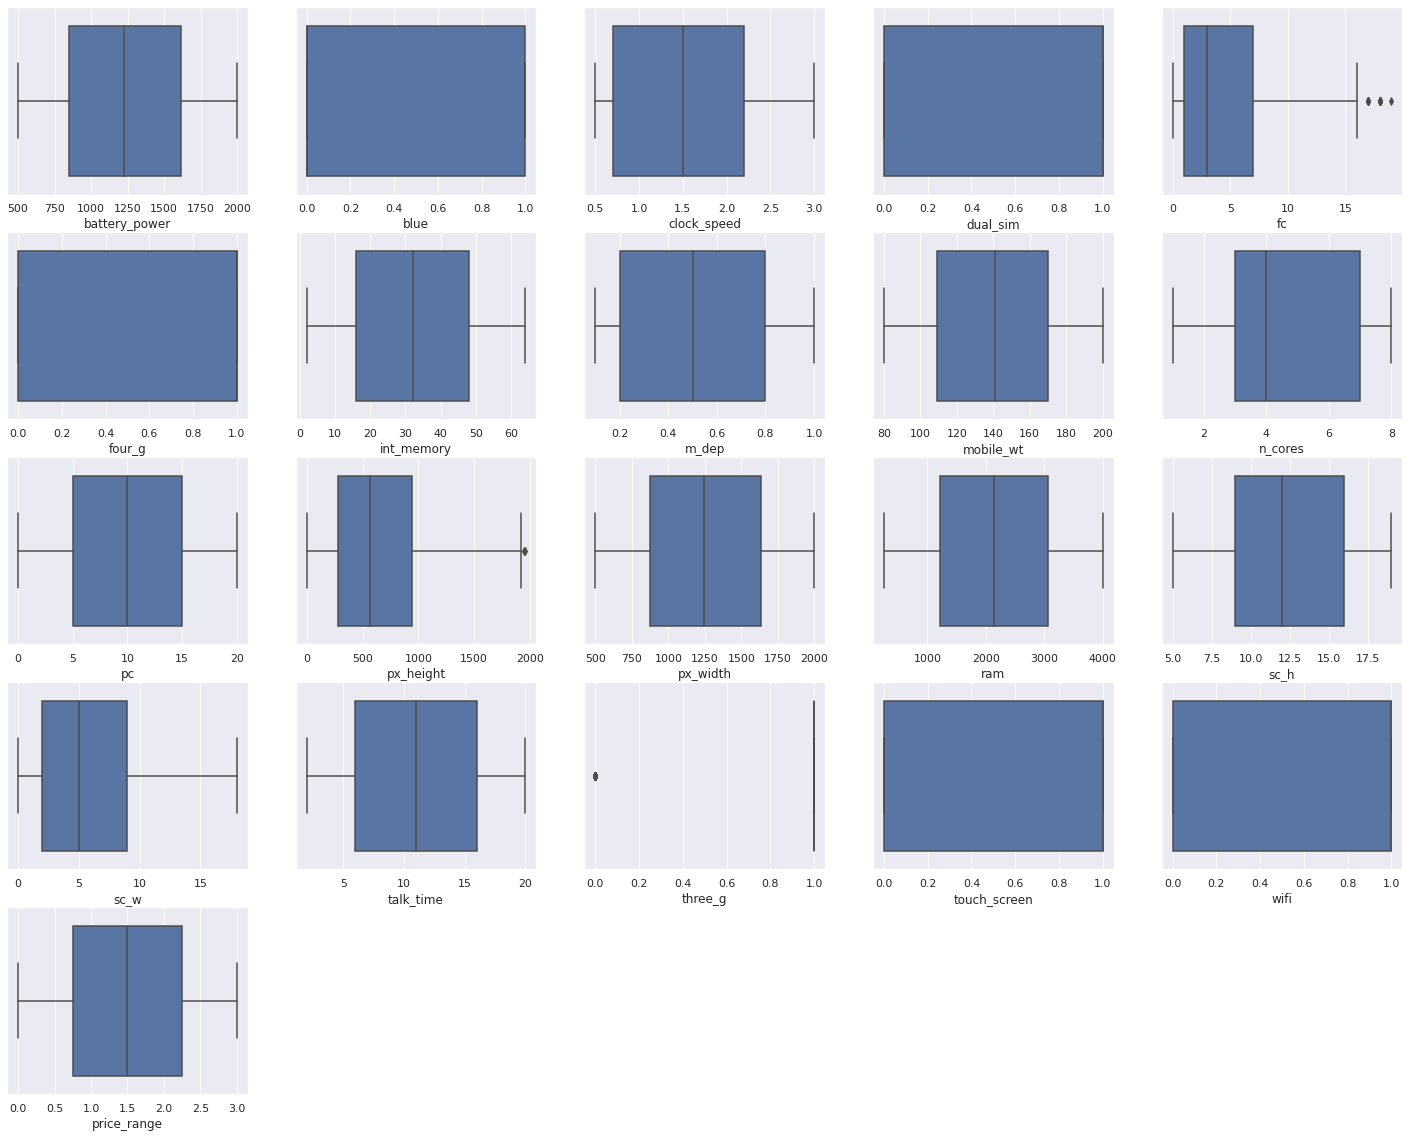

In [36]:
# Handling Outliers & Outlier treatments
plt.figure(figsize = (25,20))
for index, col in enumerate ([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[col])
  plt.xlabel(f"{col}")
  print("\n")

##### What all outlier treatment techniques have you used and why did you use those techniques?

As shown above, there seems to be no outliers in our dataset except in feature "fc" and "px_height", but these values cannot be related as outliers as they are very common types for the various types of mobile phones in the market.

### 3. Feature Manipulation & Selection

Feature Manipulation

In [37]:
# Manipulate Features to minimize feature correlation and create new features
num_columns

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [38]:
# Defining Independent vairable and Dependent variable
X = df.drop(['price_range'], axis = 1).values
Y = df['price_range']

Feature Selection

In [39]:
# Select your features wisely to avoid overfitting
print(X.shape)
Y.shape

(2000, 20)


(2000,)

Data Scaling

In [40]:
# Scaling your data
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

##### Which method have you used to scale you data and why?

Data Splitting

In [41]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20, random_state = 2)

##### What data splitting ratio have you used and why? 

Splitting ratio is 20 in test and 80 in train.

## ***6. ML Model Implementation***

### ML Model - 1 Logistic Regression
### Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

In [42]:
# ML Model - 1 Implementation
logistic_regression = LogisticRegression()
# Fit the Algorithm
logistic_regression.fit(X_train, y_train)
# Predict on the model
y_pred_test = logistic_regression.predict(X_test)
y_pred_train = logistic_regression.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart
# Function for Evaluation Metrics
def evaluation_metrics(model,y_test,y_pred):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred, average='micro')] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred, average='micro')] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred, average='micro')] #F1 Score

    metrics_df = pd.DataFrame(metrics_dict)
    print(metrics_df)

In [44]:
# Function for Confusion_Matrix
def plot_confusion_matrix(model, X_test, y_test, y_pred):
    label = ['1', '0']
    cm = confusion_matrix(y_test, y_pred_test)
    group_names = ['True positive','False Positive','False Negative','True Negative']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
    ax.set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})
    ax.xaxis.set_ticklabels(label)
    ax.yaxis.set_ticklabels(label)
    plt.show()

In [45]:
# Function for Plotting ROC Curve
def plot_roc_curve(model, X_test, y_test, y_pred):
    plt.figure(figsize = (12,5))
    pred_proba = model.predict_proba(X_test)
    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)     
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)
    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
    plt.legend(loc='best')
    plt.show()

In [46]:
evaluation_metrics(logistic_regression,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0          0.9275     0.9275  0.9275    0.9275


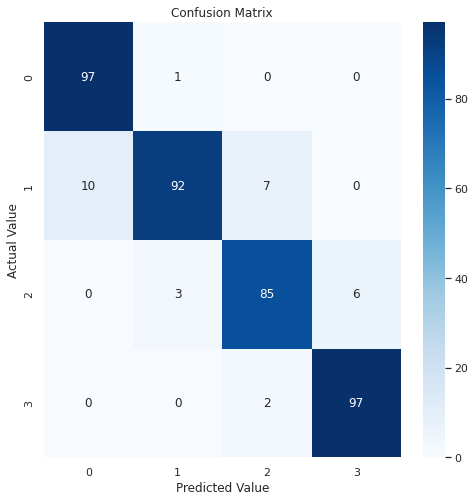

In [47]:
cf = confusion_matrix(y_test, y_pred_test)

ax = sns.heatmap(cf, annot = True, cmap = 'Blues')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
plt.show()

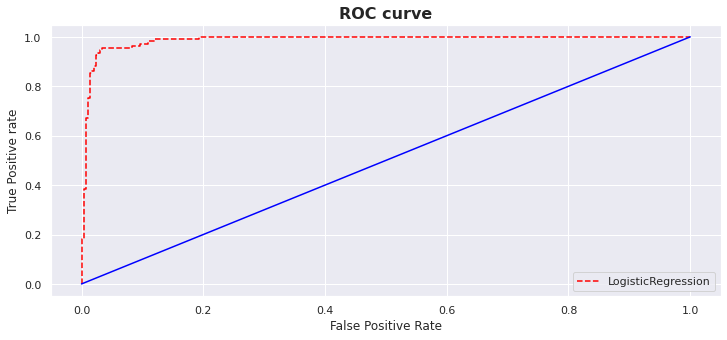

In [48]:
plot_roc_curve(logistic_regression,X_test,y_test,y_pred_test)

### ML Model - 2 Decision Tree Classifier
### A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [49]:
# ML Model - 2 Implementation
DecisionTreeClassifier = DecisionTreeClassifier()
# Fit the Algorithm
DecisionTreeClassifier.fit(X_train, y_train)
# Predict on the model
y_pred_test = DecisionTreeClassifier.predict(X_test)
y_pred_train = DecisionTreeClassifier.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(DecisionTreeClassifier,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0          0.8375     0.8375  0.8375    0.8375


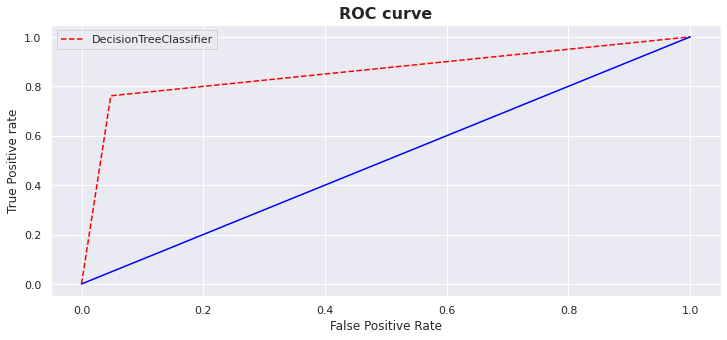

In [51]:
plot_roc_curve(DecisionTreeClassifier,X_test,y_test,y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model2_classifier =  DecisionTreeClassifier()
parameters_decision_tree = {"max_depth" : [5,7,9],"min_samples_leaf":[1,3,5],"max_leaf_nodes":[20,40,60],'random_state':[24]}
model2_classifier_CV = GridSearchCV(model2_classifier,param_grid = parameters_decision_tree,cv =3, scoring = 'accuracy')            
# Fit the Algorithm
model2_classifier.fit(X_train, y_train)
# Predict on the model
y_pred_train =  model2_classifier.predict(X_train)
y_pred_test  = model2_classifier.predict(X_test)

In [56]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(model2_classifier,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0          0.8425     0.8425  0.8425    0.8425


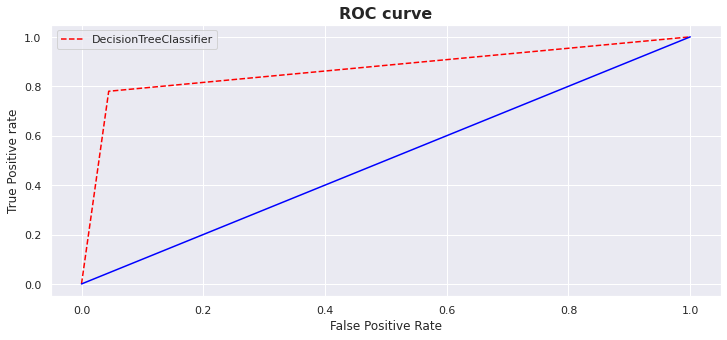

In [57]:
plot_roc_curve(model2_classifier,X_test,y_test,y_pred_test)

##### Which hyperparameter optimization technique have you used and why?

We used Grid Search CV hyperparameter tuning technique for Decision Tree Classifier.

### ML Model - 3 Random Forest Classifier


In [59]:
# ML Model - 3 Implementation (RandomForestClassifier)
model3 = RandomForestClassifier()
# Fit the Algorithm
model3 = model3.fit(X_train,y_train)
# Predict on the model
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(model3,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0          0.9025     0.9025  0.9025    0.9025


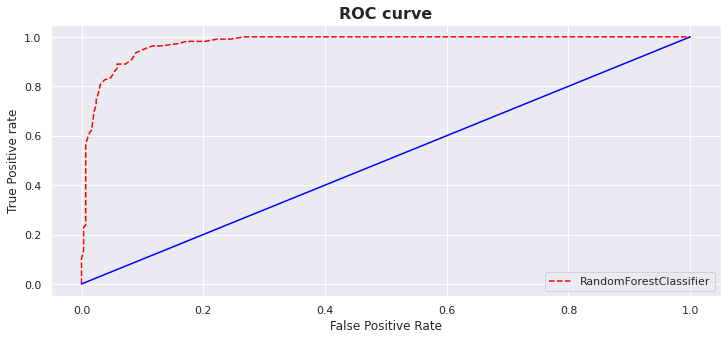

In [61]:
plot_roc_curve(model3,X_test,y_test,y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model3_classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50,70,100], "max_depth" : [5,25,50],"min_samples_leaf":[2,10,20],'random_state':[24]}
model3_classifier_CV = GridSearchCV(model3_classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3,verbose=2)
# Fit the Algorithm
model3_classifier_CV.fit(X_train, y_train)
# Predict on the model
y_pred_train =  model3_classifier_CV.best_estimator_.predict(X_train)
y_pred_test  = model3_classifier_CV.best_estimator_.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, n_estimators=50, random_state=24; tota

In [63]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(model3_classifier_CV,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0            0.86       0.86    0.86      0.86


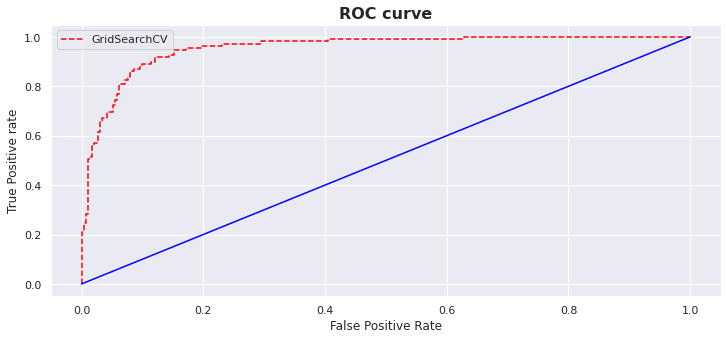

In [64]:
plot_roc_curve(model3_classifier_CV,X_test,y_test,y_pred_test)

##### Which hyperparameter optimization technique have you used and why?

We used Grid Search CV hyperparameter tuning technique for Random Forest Classifier.

### ML Model - 4 XGB Classifier
### XGB Classifier is a machine learning algorithm that is used for classification tasks. It is an implementation of the gradient boosting decision tree algorithm, which is a type of ensemble learning method. XGB Classifier stands for "Extreme Gradient Boosting Classifier".

In [65]:
# ML Model - 4 Implementation (XGBClassifier)
XGBClassifier = XGBClassifier()
# Fit the Algorithm
XGBClassifier = XGBClassifier.fit(X_train,y_train)
# Predict on the model
y_pred_train = XGBClassifier.predict(X_train)
y_pred_test = XGBClassifier.predict(X_test)

In [66]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(XGBClassifier,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0          0.9175     0.9175  0.9175    0.9175


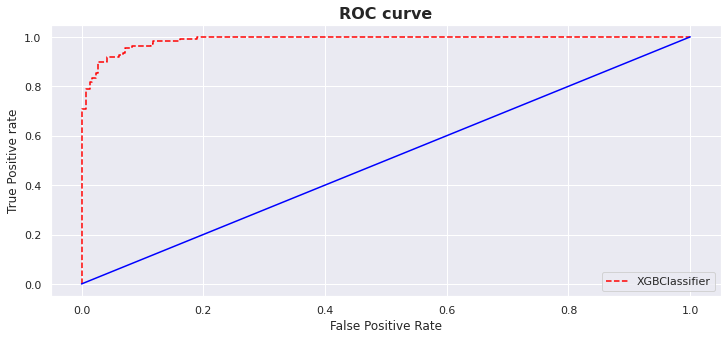

In [67]:
plot_roc_curve(XGBClassifier,X_test,y_test,y_pred_test)2

# **Conclusion**

After loading our dataset, initially we checked for null values and duplicates. There were no null values and duplicates, so treatment for null values was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process ML algorithms.

Next, we implemented four machine learning algorithms namely, 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', & 'XGBClassifier'. We did hyperparameter tuning into improve our models performance. The 'RandomForestClassifier' & 'XGBClassifier' models are best performing models with test accuracy score of 82%. From all the above experiments we can conclude that logistic regression and random forest have high score and we got the best results but at the end we also have overfitting problem with the datasets while modeling.



Keypoints

1.   In EDA we have mobile phones in four different price range.
2.   As price range increases there is a gradual increase in the battery, also mobile phone having high price comes with good battery backup.
3. Ram is highly correlated with the target variable price_range.
4. Also Ram, battery_power & pixels played significant role in deciding the price range of mobile phone.
5. The performance of these models can be imporved by carefully selecting the features and optimizing the model parameters. Feature engineering techniques such as scaling, normalization, and one-hot encoding can also be used to preprocess the data and improve the accuracy of the model.

Overall, mobile price range prediction is a valuable application of machine learning that has the potential to benefit both businesses and customers in the mobile phone industry.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***